# Convolutional Neural Network

### Importing the libraries

In [9]:
import tensorflow as tf
import keras

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
tf.__version__

'2.3.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'C:\Users\prana\OneDrive\Documents\DEEP LEARNING A-Z\Part 2 - Convolutional Neural Networks\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\prana\OneDrive\Documents\DEEP LEARNING A-Z\Part 2 - Convolutional Neural Networks\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [17]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [19]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [21]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [22]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [23]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [25]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 205s 818ms/step - loss: 0.6616 - accuracy: 0.5990 - val_loss: 0.5869 - val_accuracy: 0.7155
Epoch 2/25
250/250 [==============================] - 64s 255ms/step - loss: 0.5826 - accuracy: 0.6986 - val_loss: 0.5486 - val_accuracy: 0.7395
Epoch 3/25
250/250 [==============================] - 63s 251ms/step - loss: 0.5477 - accuracy: 0.7169 - val_loss: 0.5146 - val_accuracy: 0.7595
Epoch 4/25
250/250 [==============================] - 63s 252ms/step - loss: 0.5128 - accuracy: 0.7475 - val_loss: 0.5193 - val_accuracy: 0.7490
Epoch 5/25
250/250 [==============================] - 63s 250ms/step - loss: 0.4909 - accuracy: 0.7670 - val_loss: 0.4779 - val_accuracy: 0.7680
Epoch 6/25
250/250 [==============================] - 63s 252ms/step - loss: 0.4747 - accuracy: 0.7659 - val_loss: 0.4671 - val_accuracy: 0.7740
Epoch 7/25
250/250 [==============================] - 62s 248ms/step - loss: 0.4547 - accuracy: 0.7855 - val_loss: 0.4725 - val_a

## Part 4 - Making a single prediction

In [87]:
import numpy as np
from keras.preprocessing import image
from PIL import Image

test_image = image.load_img(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/1.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

Prediction:  dog


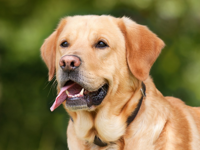

In [88]:
img = Image.open(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/1.jpg')
img = img.resize((200,150))
print("Prediction: ", prediction)
img

## Test 2

Prediction:  cat


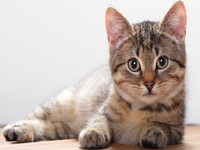

In [90]:
test_image = image.load_img(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/2.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

img_2 = Image.open(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/2.jpg')
img_2 = img_2.resize((200,150))
print("Prediction: ", prediction)
img_2

## Test 3

Prediction:  cat


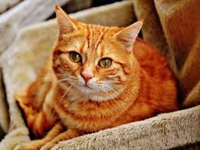

In [91]:
test_image = image.load_img(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/3.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

img_3 = Image.open(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/3.jpg')
img_3 = img_3.resize((200,150))
print("Prediction: ", prediction)
img_3

## Test 4

Prediction:  dog


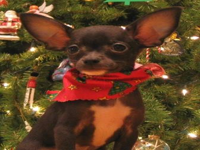

In [93]:
test_image = image.load_img(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/4.jpg',
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

img_4 = Image.open(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/4.jpg')
img_4 = img_4.resize((200,150))
print("Prediction: ", prediction)
img_4

## Test 5

Prediction:  cat


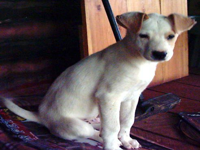

In [95]:
test_image = image.load_img(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/5.jpg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

img_5 = Image.open(r'C:\Users\prana\OneDrive\Documents\TEST CAT or DOG/5.jpg')
img_5 = img_5.resize((200,150))
print("Prediction: ", prediction)
img_5

80% of the test datas were correctly identified